# LAB 5

**TEAM MEMBER:**
Radhika Mardikar, Xinxin Mo

# Step 1:
Here we take the sequences used in the experiment and create a table using that data.

YES-1 riboswitch from Figure 2a

NOT-1 riboswitch in Figure 4a

AND-1 riboswitch in Figure 5a

OR-1 riboswitch in Figure 6a

# Step 2:

For each riboswitch, produce a table in iPynb that contains the following information: (1) riboswitch name; (2) start and end coordinates of OBS-1; (3) start and end cooridinates of OBS-2; (4) start and end cooridnates of the two red regions.


In [38]:
import sqlite3
import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [39]:
conn = sqlite3.connect('riboswitches.db')
c = conn.cursor()
#c.execute('CREATE TABLE riboswitches (riboswitch TEXT, OBS1 TEXT, OBS2 TEXT, red_region TEXT);')
c.executemany('INSERT INTO riboswitches(riboswitch, OBS1, OBS2, red_region) VALUES(?, ?, ?, ?)',
         [('YES-1', '26-47', '', '16-21, 49-54'),
          ('NOT-1', '44-66', '', '40-44, 74-78'),
          ('AND-1', '30-45', '49-65', '16-23, 70-77'),
         ('OR-1', '27-46', '47-66', '16-26, 67-77')])  
conn.commit()
seqyes1 = 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'
seqnot1 = 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUUGCGUCCUGUAUUCCACUGC'
seqand1 = 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU'
seqor1 = 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUGCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'
sequences = [seqyes1, seqnot1, seqand1, seqor1]

# Step 3: 
Now, we'll create a routine to model RNA folding.
Typing in the RNAplot command into the terminal command line and using the sequence of yes1 gives the following output. 

Start by generating one plot per riboswitch (YES-1, NOT-1, AND-1, and OR-1) with default parameters.

Then we use the subprocess module to run RNAfold at ipynb. The code is as follow:


In [43]:
seqs = \
"""
>seqyes1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>seqnot1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUUGCGUCCUGUAUUCCACUGC
>seqand1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>seqor1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUGCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
"""

# define the subprocess
p = subprocess.run('RNAfold', input = bytes(seqs, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
print(p.stderr.decode())
print(p.stdout.decode())


>seqyes1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
>seqnot1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..))))..)))))).))))))....)))) (-26.30)
>seqand1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
>seqor1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUGCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.((.((....)))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-38.00)



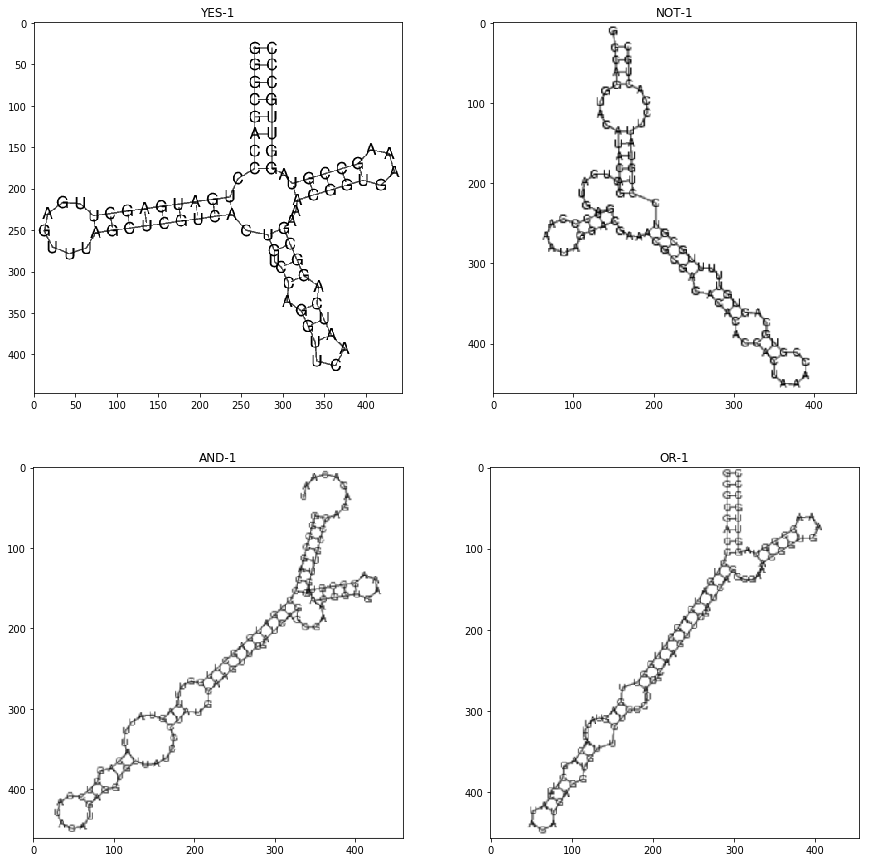

In [47]:
# read the coresponding images of generated *.ps files
plt.figure(num=None, figsize=(15,15))
img1 = mpimg.imread('yes1.png')
plt.subplot(221)
plt.title('YES-1')
plt.imshow(img1)
img2 = mpimg.imread('not1.PNG')
plt.subplot(222)
plt.title('NOT-1')
plt.imshow(img2)
img3 = mpimg.imread('and1_cs1.PNG')
plt.subplot(223)
plt.title('AND-1')
plt.imshow(img3)
img4 = mpimg.imread('or1_cs1.PNG')
plt.subplot(224)
plt.title('OR-1')
plt.imshow(img4)

Comparing these images to the corresponding images, we find that there are some differences at YES-1. The structure that we generated has one more branch than the structure on the paper. For other riboswitches, we find that the stem-loop structures can be matched up. However, for NOT-1, there is one more loop formed at the unbounded nucleotides.

## Step 4

Next, simulate OBS binding in YES-1 and NOT-1. 

(1) Use a dot (“.”) for every unconstrained base, and a lower-case x for every base that we want to prevent from pairing. That is to say, put an x at every base spanning the blue OBS region. We wrote the constraint for each RNA switch in text file, namely "yes1_constraints.txt" and "not1_constraints.txt".

In [48]:
# define a function for reading the constrainfile and run the RNAfold subprocess
def readRunConstraint(filename):
    infile = open(filename, 'r')
    constraintFile = infile.read()
    p = subprocess.run(['RNAfold', '--constraint'], input = bytes(constraintFile, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
    print(p.stdout.decode())

In [49]:
# input the constraint file for each RNA switch
readRunConstraint("yes1_constraints.txt")
readRunConstraint("not1_constraints.txt")

>yes1_cst
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).)))))))) (-24.50)

>not1_cst
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((((.......................)))))))..))))))))))....)))) (-20.60)



Plot the OBS binding image we generated with constraints.

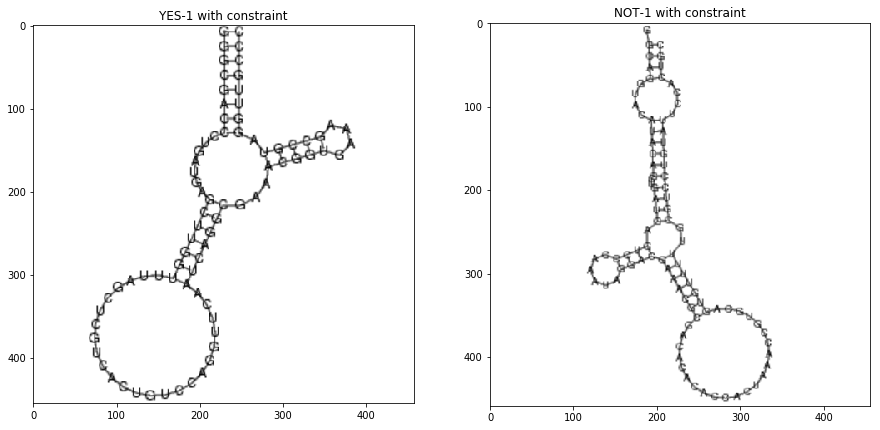

In [50]:
# read the coresponding images of generated *.ps files
plt.figure(num=None, figsize=(15,15))
img1 = mpimg.imread('yes1_cs.PNG')
plt.subplot(121)
plt.title('YES-1 with constraint')
plt.imshow(img1)
img2 = mpimg.imread('not1_cs.PNG')
plt.subplot(122)
plt.title('NOT-1 with constraint')
plt.imshow(img2)

For YES-1, the red region paired, and it looks like the same self-cleaving structure at the paper fig.2. However, for the NOT-1, the red region doesn't paired.

(2) Simulating OBS binding for AND-1 and OR-1 is more complicated. Recall that AND and OR logic gates have two inputs, and so their truth tables have four rows: F/F, T/F, F/T, and T/T. We put the 4 constrains of AND-1 and OR-1 into file "and1_constraints.txt" and "or1_constraints.txt".


In [35]:
# input the constraint file of AND-1 and OR-1
readRunConstraint("and1_constraints.txt")
readRunConstraint("or1_constraints.txt")

>and1_cst1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
>and1_cst2
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)
>and1_cst3
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((((((...(((.......))))))........................))))).))))).....(((((....))))).))))))))......... (-29.60)
>and1_cst4
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((..............................................))))).))))).....(((((....))))).))))))))......... (-27.64)

>or1_cst1
GGGCG

Plot the OBS binding images we generated with constraints for AND-1 and OR-1.

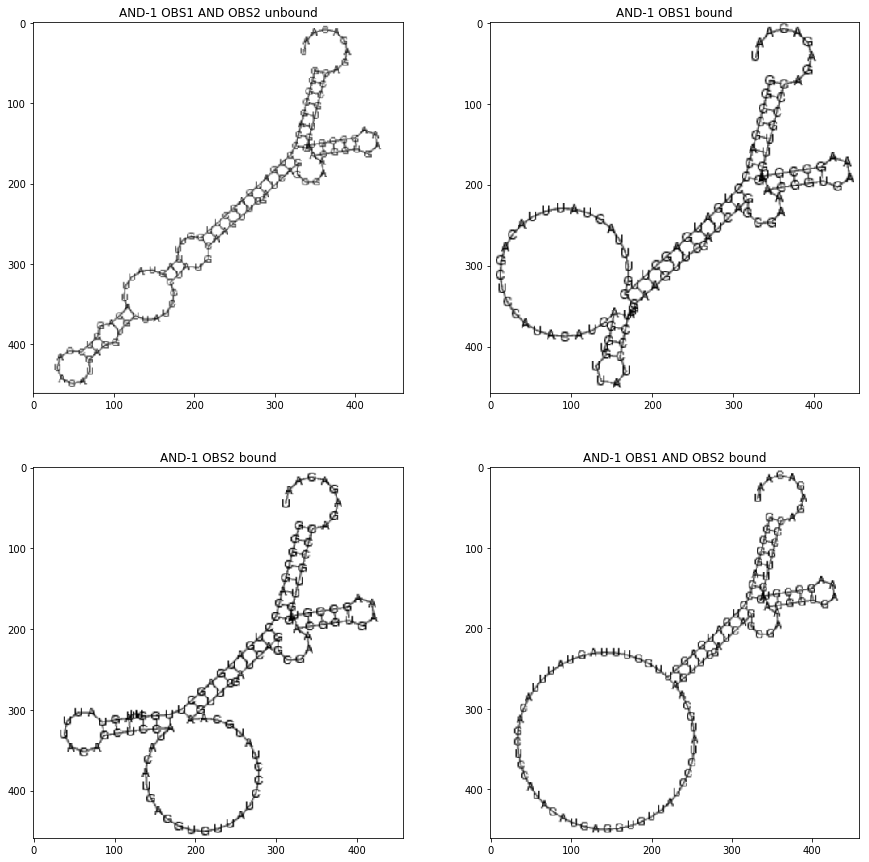

In [36]:
# read the coresponding images of generated *.ps files
# AND-1
plt.figure(num=None, figsize=(15,15))
img1 = mpimg.imread('and1_cs1.PNG')
plt.subplot(221)
plt.title('AND-1 OBS1 AND OBS2 unbound')
plt.imshow(img1)
img2 = mpimg.imread('and1_cs2.PNG')
plt.subplot(222)
plt.title('AND-1 OBS1 bound')
plt.imshow(img2)
img3 = mpimg.imread('and1_cs3.PNG')
plt.subplot(223)
plt.title('AND-1 OBS2 bound')
plt.imshow(img3)
img4 = mpimg.imread('and1_cs4.PNG')
plt.subplot(224)
plt.title('AND-1 OBS1 AND OBS2 bound')
plt.imshow(img4)

We write down the truth table for AND-1.

| OBS1  | OBS2 | OUTPUT |
| :----------: | :----------: | :----------: |
| unbound | unbound | False |
| bound | unbound | False |
| unbound | bound | False |
| bound | bound | True |

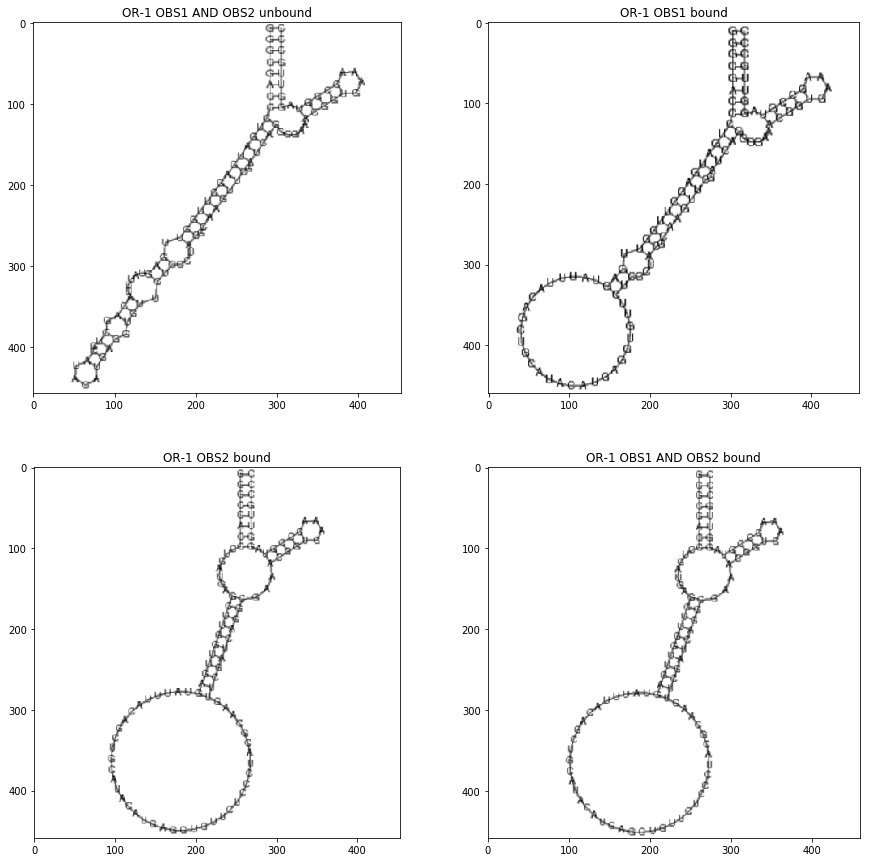

In [37]:
# read the coresponding images of generated *.ps files
# OR-1
plt.figure(num=None, figsize=(15,15))
img1 = mpimg.imread('or1_cs1.PNG')
plt.subplot(221)
plt.title('OR-1 OBS1 AND OBS2 unbound')
plt.imshow(img1)
img2 = mpimg.imread('or1_cs2.PNG')
plt.subplot(222)
plt.title('OR-1 OBS1 bound')
plt.imshow(img2)
img3 = mpimg.imread('or1_cs3.PNG')
plt.subplot(223)
plt.title('OR-1 OBS2 bound')
plt.imshow(img3)
img4 = mpimg.imread('or1_cs4.PNG')
plt.subplot(224)
plt.title('OR-1 OBS1 AND OBS2 bound')
plt.imshow(img4)

We write down the truth table for OR-1.

| OBS1  | OBS2 | OUTPUT |
| :----------: | :----------: | :----------: |
| unbound | unbound | False |
| bound | unbound | True |
| unbound | bound | True |
| bound | bound | True |

According to our results, the AND-1 and OR-1 riboswitches work as the paper claims.